# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative


## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [283]:
# Import the appropriate libraries with aliases
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [284]:
# EDA Question 1A solution below:

# find the number of unique values in the Rep ID column
reps_in_north = north_df["Rep ID"].nunique()
print("# Representatives in the North call center: ", reps_in_north)


# Representatives in the North call center:  9


#### EDA Question 1B:  How many reps are in the South branch?  

In [249]:
# EDA Question 1B solution Below:

# find the number of unique values in the Rep ID column
reps_in_south = south_df["Rep ID"].nunique()
print("# Representatives in the South call center: ", reps_in_south)

# Representatives in the South call center:  11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [250]:
# EDA Question 2A solution Below:

round(north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean(),2)

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [251]:
# EDA Question 2B solution Below:

round(south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean(),2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [252]:
# EDA Question 3 solution Below:
import numpy as np
# Series containing counts of each unique 'Time Block' for north 
# and south call centers
CallsPerBlock_north = north_df['Time Block'].value_counts()
CallsPerBlock_south = south_df['Time Block'].value_counts()

# series containing all the 'Time Blocks' 
TimeBlocks = north_df['Time Block'].unique()

# initialize an empty dictionary to hold the combined calls
calls = {}

# loop through the time blocks to add the north and south call centers'
# calls for each time block.
for block in TimeBlocks:
    calls.update({block : (CallsPerBlock_north[block]+CallsPerBlock_south[block])})

# print the dictionary with 
print(calls)

{'9:00 AM': 10, '11:00 AM': 56, '4:00 PM': 53, '12:00 PM': 120, '2:00 PM': 65, '3:00 PM': 73, '1:00 PM': 40, '10:00 AM': 99, '5:00 PM': 43}


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [253]:
# Question 1 solution below
# Looking for missing data in every column of the call centers
import numpy as np

print("\nPercentage of missing data from each column of North Call Center:")

# for every column in the north call center calcualte the avg% of missing data ((sum or count of null values)/(total no. of values))*100
# and print the column and % of missing data
for col in north_df.columns:
    pct_missing_north = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing_north*100)))

print("\nPercentage of missing data from each column of South Call Center:")

# for every column in the south call center calcualte the avg% of missing data ((sum or count of null values)/(total no. of values))*100
# and print the column and % of missing data
for col in south_df.columns:
    pct_missing_south = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing_south*100)))


Percentage of missing data from each column of North Call Center:
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%

Percentage of missing data from each column of South Call Center:
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: The 'Incoming Wait Time' column of the North call center has 67% missing data and the South Call Center has 60% missing data.
I am choosing to leave the missing data as nulls and not replace the nulls with zero or with average of 'Incoming Wait Time' column. Replacing the nulls might inaccurately represent the service % or the percentage of calls answered within 2 sec which is used as a measure to identify the call center efficiency.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [254]:
# Cleaning Question 2 solution below:

# finding the unique values in the 'Sale' column.
print(north_df['Sale'].unique()) # Has two separate 'YES' values - 'YES ' and 'YES'

# stripping all the spaces in the 'Sale' column.
north_df['Sale'] = north_df['Sale'].str.strip()

# checking if the unique values in the 'Sale' column are consistent and truly unique
print(north_df['Sale'].unique())

['NO' 'YES ' 'YES']
['NO' 'YES']


##### Record your answer by below:
> Your Answer: The 'Yes' value was entered with and without spaces which made the data inconsistent. Using the .str.strip() function on the 'Sale' column the data is now consistent in values without any spaces.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [257]:
# Cleaning Question 3 solution below:

# checking for all duplicates in the north call center.
north_duplicates = north_df[north_df.duplicated(keep=False)]
print("There are ", len(north_duplicates), " duplicates in the North call center.")

# checking for all duplicates in the south call center.
south_duplicates = south_df[south_df.duplicated(keep=False)]
print("There are ", len(south_duplicates), " duplicates in the South call center.")


There are  0  duplicates in the North call center.
There are  0  duplicates in the South call center.


##### Record your answer below:
> Your Answer: There are no duplicates in both the datasets. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [286]:
# Cleaning Question 4 solution below:    drop - unnamed column

print(north_df.shape)
north_df = north_df.drop(["Unnamed: 0"], axis=1)
print(north_df.shape)

print(south_df.shape)
south_df = south_df.drop(["Unnamed: 0"], axis=1)
print(south_df.shape)


(245, 15)
(245, 14)
(314, 15)
(314, 14)


##### Record your answer below:
> Your Answer: "Unnamed: 0" is the only unnecessary column in the datasets. So, the "Unnamed: 0" column will be dropped from both the datasets.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [287]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df]) 
df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [333]:
# Manipulation Question solution below:
# group by 'Branch' and then by 'Rep ID' and sum all the values 
# sort by 'Calls' in descending order 
# .head(3) to find the reps in each branch with top 3 highest number of calls
grouped_df = df.groupby(["Branch", "Rep ID"]).sum(numeric_only=True) 
data = grouped_df.sort_values(by='Calls',ascending=False).head(3)
print(data)

               Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Brent           0          1           362                 71   
South  Eric            0          0           361                 54   
       Randy           3          1           320                 66   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Brent                 17.0                    117     37  
South  Eric                  47.0                    112     35  
       Randy                 47.0                     98     33  


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls    

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [265]:
# Manipulation Question 2 solution below:

north_call_abandonment_rate = (north_df['Abandoned'].sum()/north_df['Calls'].sum())*100
print("The average call abandonment rate of the North branch is ", round(north_call_abandonment_rate,2),'%')

south_call_abandonment_rate = (south_df['Abandoned'].sum()/south_df['Calls'].sum())*100
print("The average call abandonment rate of the South branch is ",round(south_call_abandonment_rate,2),'%')

company_call_abandonment_rate = (df['Abandoned'].sum()/df['Calls'].sum())*100
print("The average call abandonment rate of the company is ",round(company_call_abandonment_rate,2),'%')


The average call abandonment rate of the North branch is  2.86 %
The average call abandonment rate of the South branch is  1.27 %
The average call abandonment rate of the company is  1.97 %


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [266]:
# Manipulation Question 3 solution below:

# filter the dataset to get the data of calls with 2 sec or less 'Incoming Wait Time'
north_calls_within2 = north_df[(north_df['Incoming Wait Time'] <= 2)]['Calls'].sum()
# filter the dataset to get the data of 'Incoming' calls only
north_incoming = north_df[(north_df['Incoming or Outgoing'] == 'Incoming')]['Calls'].sum()
print("Percentage of calls answered within 2 seconds in North branch ", 
      round((north_calls_within2/north_incoming)*100,2),'% for ', north_calls_within2, 'calls.')

# filter the dataset to get the data of calls with 2 sec or less 'Incoming Wait Time'
south_calls_within2 = south_df[(south_df['Incoming Wait Time'] <= 2)]['Calls'].sum()
# filter the dataset to get the data of 'Incoming' calls only
south_incoming = south_df[(south_df['Incoming or Outgoing'] == 'Incoming')]['Calls'].sum()
print("Percentage of calls answered within 2 seconds in South branch ", 
      round((south_calls_within2/south_incoming)*100,2),'% for ', south_calls_within2, 'calls.')

# filter the dataset to get the data of calls with 2 sec or less 'Incoming Wait Time'
company_calls_within2 = df[(df['Incoming Wait Time'] <= 2)]['Calls'].sum()
# filter the dataset to get the data of 'Incoming' calls only
company_incoming = df[(df['Incoming or Outgoing'] == 'Incoming')]['Calls'].sum()
print("Percentage of calls answered within 2 seconds in the company ", 
      round((company_calls_within2/company_incoming)*100,2),'% for ', company_calls_within2, 'calls.')


Percentage of calls answered within 2 seconds in North branch  40.24 % for  33 calls.
Percentage of calls answered within 2 seconds in South branch  38.1 % for  48 calls.
Percentage of calls answered within 2 seconds in the company  38.94 % for  81 calls.


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24 % for  33 calls
- South Branch = 38.1 % for  48 calls
- Company Wide = 38.94 % for  81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [268]:
# Manipulation Question 4 solution below:

north_avg_speed_answer = north_df['Incoming Wait Time'].mean()
print("Average speed of answer of North branch ", round(north_avg_speed_answer,2),'seconds')

south_avg_speed_answer = south_df['Incoming Wait Time'].mean()
print("Average speed of answer of South branch ", round(south_avg_speed_answer,2),'seconds')

company_avg_speed_answer = df['Incoming Wait Time'].mean()
print("Average speed of answer of Company ", round(company_avg_speed_answer,2),'seconds')

Average speed of answer of North branch  3.05 seconds
Average speed of answer of South branch  3.0 seconds
Average speed of answer of Company  3.02 seconds


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

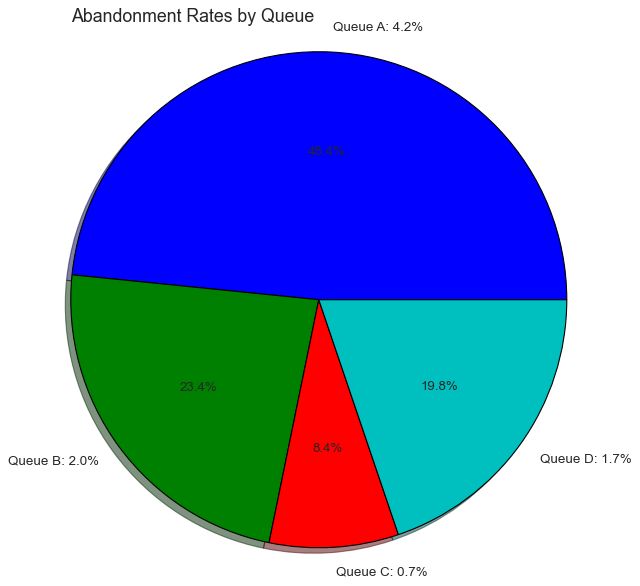

In [329]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as plt
import seaborn as sns

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
rates = abandonment_rates.values()

#Your code below:

# create pie chart
plt.figure(figsize=(8, 8))
# Combine the queue names with their abandonement rates for labels
combined_labels = [f'Queue {queues[i]}: {rate:.1%}' for i, rate in enumerate(rates)]
plt.pie(rates, labels=combined_labels, autopct='%1.1f%%', shadow=True)

plt.title('Abandonment Rates by Queue', fontsize=16, loc='left', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


##### Record your answer below:

> Chart style you chose and why: CHosen style - Pie Chart. Pie Chart is a composition chart and I chose the chart to see how the call abandonment rate is in each of the queues. From the chart, of all the calls that are being abandoned, about half the calls are from queue A which belongs to the North branch. Therefore, assigning more representatives to Queue A (North branch) will reduce its abandonement rate further.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

    Rep ID           Metric      Value
0   Amanda          Calls_y   5.000000
1     Andy          Calls_y  10.000000
2    Brent          Calls_y   8.000000
3      Cam          Calls_y  11.000000
4     Duke          Calls_y  14.000000
5      Joe          Calls_y  10.000000
6    Lilly          Calls_y  12.000000
7     Todd          Calls_y   6.000000
8   Xander          Calls_y   6.000000
9   Amanda  Service Level %  60.000000
10    Andy  Service Level %  30.000000
11   Brent  Service Level %  75.000000
12     Cam  Service Level %  45.454545
13    Duke  Service Level %  42.857143
14     Joe  Service Level %  20.000000
15   Lilly  Service Level %  33.333333
16    Todd  Service Level %  33.333333
17  Xander  Service Level %  33.333333


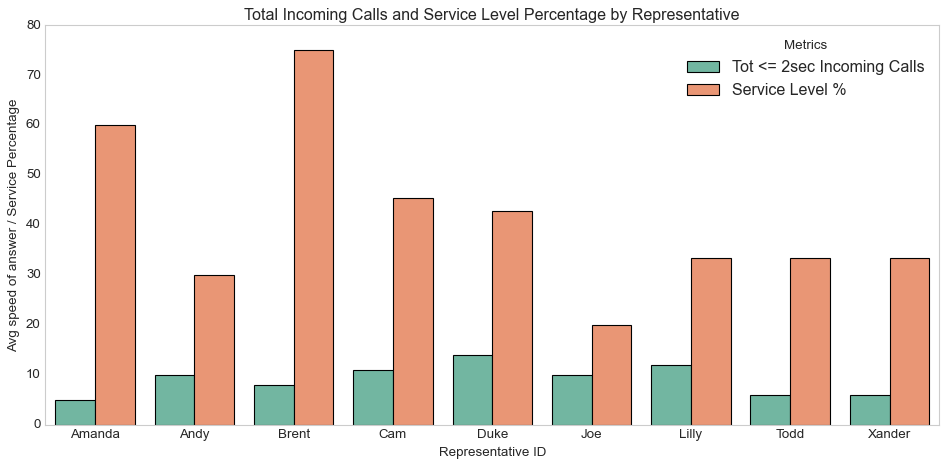

In [152]:

# Finding the average speed of answer for each rep

# .mean(): calculates the mean of the "Incoming Wait Time" for each "Rep ID". The 
# result is a Series with the average wait times indexed by the unique "Rep ID" values.
# .to_frame(): This converts the resulting Series into a DataFrame. By default, the 
# index (which is the "Rep ID") becomes one column, and the mean values become another column.
# .reset_index(): resets the index of the DataFrame to the default integer index. 
# It also converts the index (previously the "Rep ID") into a regular column.
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
# get the data for 'incoming wait time' <= 2 into a new dataframe
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
# create new df with only 'rep id' and 'calls' columns
quick_reps = quick_calls[["Rep ID", "Calls"]]
# create new dataframe 'quick_stats' containing total no. of calls answered
# in 2sec or less for every rep
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
# filters the DataFrame north_df to create a new DataFrame, total_calls_in
# selects only those rows where the "Incoming or Outgoing" column has the value "Incoming".
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
# a new DataFrame rep_calls is created by selecting only the "Rep ID" and "Calls" 
# columns from total_calls_in.
rep_calls = total_calls_in[["Rep ID", "Calls"]]
# a new DataFrame, total_stats, which contains the total number of incoming calls 
# for each representative and with 'Rep ID' as the index
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  


#  Table 3: Service Level Percentage created via merge
# service_level, will contain all columns from both DataFrames 
# - Rep ID, Calls_x(calls from quick_stats), Calls_y(calls from total_stats)
service_level = pd.merge(quick_stats, total_stats, on="Rep ID", how="outer")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Your Code Here:

# Reset index, to make rep id a regular column and add a default integer index 
service_level.reset_index(inplace=True)

# Melt the DataFrame to long format for easier plotting with Seaborn
melted = service_level.melt(id_vars='Rep ID', value_vars=['Calls_y', 'Service Level %'],
                            var_name='Metric', value_name='Value')

# Rename the 'Calls_y' to a more descriptive name
melted['Metric'] = melted['Metric'].replace({'Calls_y': 'Tot <= 2sec Incoming Calls'})

# Create the grouped column chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Rep ID', y='Value', hue='Metric', palette='Set2')

# Adding labels and title
plt.xlabel('Representative ID')
plt.ylabel('Avg speed of answer / Service Percentage')
plt.title('Total Incoming Calls and Service Level Percentage by Representative')

# Add the legend
plt.legend(title='Metrics')

# Show grid
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: 
Grouped Bar Chart - It is a comparison chart and I chose it to compare 'speed of answer' and 'service percentage'  side by side for every rep. The chart clearly shows that the 'speed of answer' and 'service percentage' are indirectly proportional to each other for every representative. The lower the 'speed of answer', the higher the 'service percentage' is.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

      Call Purpose Call Type  Count
0        Complaint  Incoming   51.0
1  Product Support  Incoming   82.0
2    Sales Support  Incoming   75.0
3        Complaint  Outgoing    0.0
4  Product Support  Outgoing  228.0
5    Sales Support  Outgoing  123.0


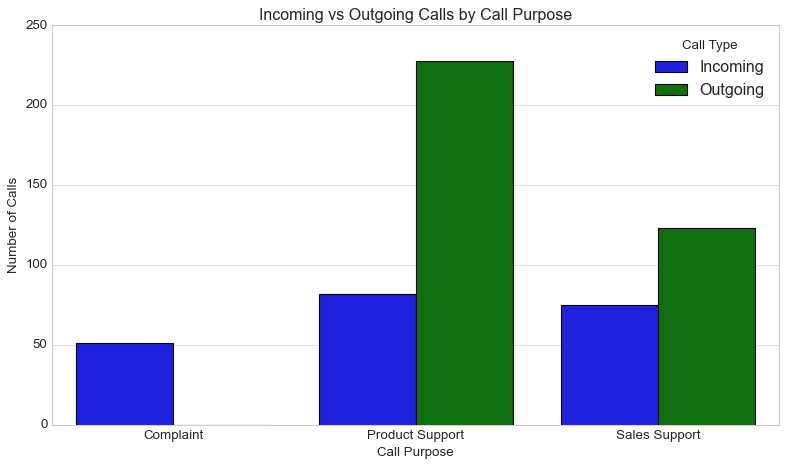

In [216]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

# # create a dataframegroupby object for all data filtered by 'Call Purpose'
# purpose_group = df.groupby("Call Purpose")
# call_purpose = ["Complaint", "Product Support", "Sales Support"]
# purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()


# Grouping the DataFrame
purpose_group = df.groupby("Call Purpose")

# Counting values
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

# Convert to DataFrame, the value counts from above is put in a col named 'Count'
# and the index is now the default integer index
purpose_counts_df = purpose_counts.reset_index(name='Count')

# Pivot the DataFrame to have 'Incoming' and 'Outgoing' as separate columns
pivot_df = purpose_counts_df.pivot(index='Call Purpose', columns='Incoming or Outgoing', values='Count').fillna(0)

# Reset the index to make 'Call Purpose' a column again
pivot_df = pivot_df.reset_index()

# Create the grouped bar plot
melted_df = pivot_df.melt(id_vars='Call Purpose', value_vars=['Incoming', 'Outgoing'],
                           var_name='Call Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Call Purpose', y='Count', hue='Call Type')

# Adding labels and title
plt.title('Incoming vs Outgoing Calls by Call Purpose')
plt.xlabel('Call Purpose')
plt.ylabel('Number of Calls')
plt.legend(title='Call Type')

# Show the plot
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: 
Grouped Bar Chart - It is a comparison chart and I chose it to compare 'incoming' and 'outgoing' calls side by side for every 'call purpose'. From the chart we can tell that twice as many calls go out for 'Product support' than the calls that come in. 'Complaint' is the category with the lowest number of incoming calls.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
North Branch = 40.24 % - Percentage of calls answered within 2 seconds
North Branch = 2.86% - Average Call Abandonment Rates
North branch  3.05 seconds - Average speed of answer

 
South Branch = 38.1 % - Percentage of calls answered within 2 seconds
South Branch = 1.27% - Average Call Abandonment Rates
South branch  3.0 seconds - Average speed of answer

From the KPIs average abandonment rate, service level and average speed of answer, the South call center is running more efficiently with lower call abandonment rates and slightly higher percentage of calls answered within 2 seconds. Although the difference in average speed of answer is negligible. This is probably due to higher number of representatives working in the South call center.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 

Representatives in the North call center:  9
Average speed of North branch  3.05 seconds

Representatives in the South call center:  11
Average speed of South branch  3.0 seconds

The difference between the average speed of both the branches is almost negligible with the South call center performing slightly better. So, the North branch would benefit from the extra help.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
I think the data provided in the datasets were sufficient for the analysis of the performance of both the branches. Thereby making the decision to allocate additional resources to the call centers clearer. Based on the analysis, 3 of the 5 new representatives to the North branch and the other 2 for the South branch will improve the efficiency of the branches respectively.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: Grouped Bar Chart - It is a comparison chart and I chose it to compare 'incoming and outgoing' calls side by side for unique 'time block' and 'call purpose' combination.

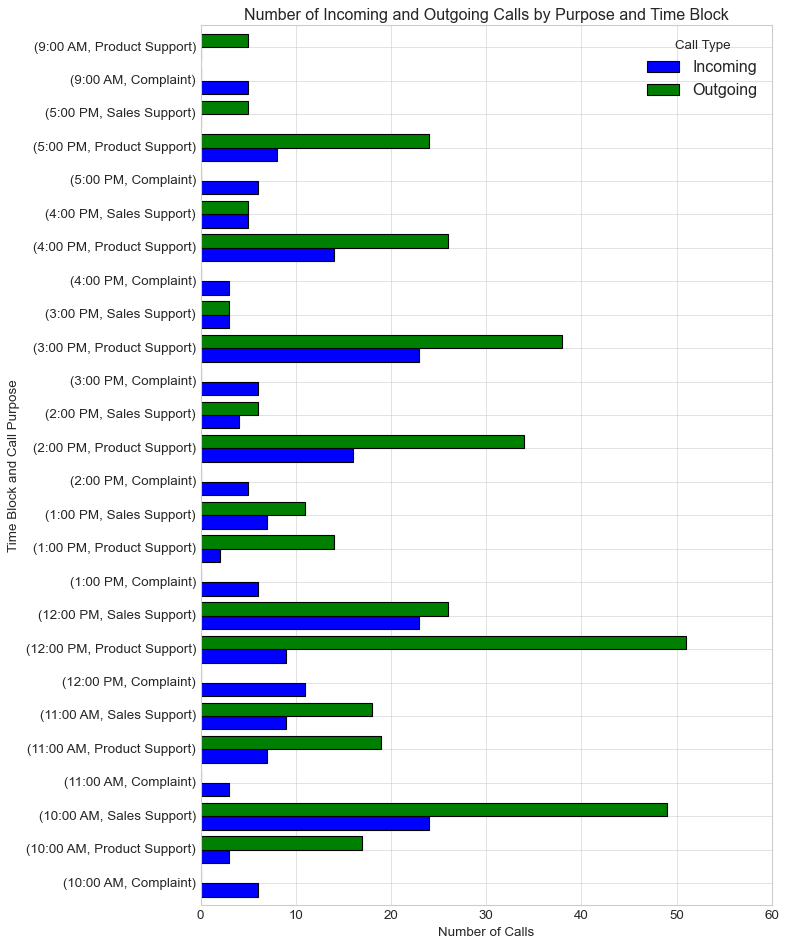

In [296]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# first group by "Time Block" and then by "Call Purpose" and then by "Incoming or Outgoing"
# use reset_index() to get proper columns with proper column names
grouped_data = df.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"].sum().reset_index()
grouped_data.sort_values("Time Block")
# Pivot the data to summarize the data in a way for easier visualization
pivot_data = grouped_data.pivot_table(index=["Time Block", "Call Purpose"], 
                                       columns="Incoming or Outgoing", 
                                       values="Calls", 
                                       fill_value=0)

# use reset_index() to get proper columns with proper column names
pivot_data = pivot_data.reset_index()

# set the index to "time block" and "call purpose" 
pivot_data = pivot_data.set_index(['Time Block','Call Purpose'])

# Plot the grouped bar chart in a horizontal orientation
# for each combination of "time block" and "call purpose" show the total no. of incoming 
# and total no. of outgoing
pivot_data.plot(kind='barh', width=0.8, figsize=(10, 12))

# Step 3: Customize the plot
plt.title('Number of Incoming and Outgoing Calls by Purpose and Time Block')
plt.ylabel('Time Block and Call Purpose')
plt.xlabel('Number of Calls')
plt.legend(title='Call Type', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()